<a href="https://colab.research.google.com/github/mhpolas/Data-science/blob/main/Google_Data_Analytics_Capstone_Case_Study_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
This is Case Study 1 of google data analytics Capstone course.

It will follow the steps of the data analysis process: Ask, prepare, process, analyze, share, and act.
Each step will follow its own roadmap with:

*   Code, if needed on the step.
*   Guiding questions, with answers.
*   Key tasks, as a checklist.
*   Deliverable, as a checklist.

*Exception: Here i will use Python code instead of R language*





# Scenario
`***You are a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, your team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, your team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve your recommendations, so they must be backed up with compelling data insights and professional data visualizations.***`

# Ask
**Guiding questions:**
 
What is the problem you are trying to solve?

* The main goal is to find the best stratige to convert casual riders to  annual members.

How can your insights drive business decisions?

* The marketing team will use the findings to increase annual members.


**Key tasks:** 
* Identify the business task
* Consider key stakeholders

**Deliverable**

*   A clear statement of the business task




# Prepare
In this project i will data from google provided [link](https://divvy-tripdata.s3.amazonaws.com/index.html). The data has been made available by Motivate International Inc. 

**Guiding questions:**

Where is your data located?
*   I used data from Motivate International Inc. For this project i have stored data on my pc.

How is the data organized?
 
*   The datasets are divided into distinct csv files for each month.

Are there issues with bias or credibility in this data? Does your data ROCCC?

* As this information is obtained directly by the bike-share company and the population is made up of all of its clients, there are no issues with bias or credibility. the data is accurate, well-organized, complete, up-to-date, and cited.

How are you addressing licensing, privacy, security, and accessibility?
* The dataset is under the company's own license. The dataset does not contain any more details regarding the cyclists' personal information.

How did you verify the data’s integrity?
* Each column has the proper data type and all of the files have consistently lebeled columns.

How does it help you answer your question?
* This will help in answering my question because it can provide insightful perception on the rider's pattern of activity.
 
Are there any problems with the data?

* There are some cells that have blank or empty values.

**Key tasks**
* Download data and store it appropriately.

* Identify how it’s organized.

* Sort and filter the data.

* Determine the credibility of the data

**Deliverable** 

A description of all data sources used
* The main data source is 12 months (Between June 2021 and july 2022 ) of riding data provided by the Cicylistic company.

# Process


Merge 12 months tripdata csv files to one csv file.And save it as tripdata.csv file.

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.express as px
from datetime import datetime



In [ ]:
df=pd.concat(map(pd.read_csv,['202107-divvy-tripdata.csv','202108-divvy-tripdata.csv','202109-divvy-tripdata.csv','202110-divvy-tripdata.csv','202111-divvy-tripdata.csv','202112-divvy-tripdata.csv','202201-divvy-tripdata.csv','202202-divvy-tripdata.csv','202203-divvy-tripdata.csv','202204-divvy-tripdata.csv','202205-divvy-tripdata.csv','202206-divvy-tripdata.csv']), ignore_index=True)


In [ ]:
df.to_csv('tripdata.csv',index=False)


## Data cleaning




Removed unnamed colum

In [ ]:
df=pd.read_csv('tripdata.csv')
df.info()



In [ ]:
df.drop('Unnamed: 0',axis="columns",inplace = True)

In [ ]:
df.head(5)

Removed duplicates cell

In [ ]:
df.drop_duplicates(inplace = True)
df.duplicated(keep=False).sum()

Remove empty cells

In [ ]:
df.dropna(inplace = True)

Parsing datetimes columns

In [ ]:
df['started_at']=pd.to_datetime(df['started_at'],format="%Y-%m-%d %H:%M:%S")
df['ended_at']=pd.to_datetime(df['ended_at'],format="%Y-%m-%d %H:%M:%S")

Total ride time in Minutes

In [ ]:
df['total_time_m']=(df['ended_at']-df['started_at'])/np.timedelta64(1, 'm')

Separate the year and the month into one column

In [ ]:

df['year_month']=df['started_at'].dt.strftime('%Y-%m(%b)')


Separate the weekday column

In [ ]:
df['weekday']=df['ended_at'].dt.strftime('%u-%a')

Separate the start hour column


In [ ]:
df['starthour']=df['ended_at'].dt.strftime('%H')

In [ ]:
df.head()

In [ ]:

df.info()

**Saving the result in csv**

In [ ]:
df.to_csv('tripdata.csv',index=False)

## Guiding questions

**What tools are you choosing and why?**
* I'm using python for this project, for two main reasons: Because of the large dataset and to gather experience with the language

**Have you ensured your data’s integrity?**

* Yes, the data is consistent throughout the columns.

**What steps have you taken to ensure that your data is clean?**

* First the duplicated values where removed, then the columns where formatted to their correct format.

**How can you verify that your data is clean and ready to analyze?**

* It can be verified by this notebook.

**Have you documented your cleaning process so you can review and share those results?**

* Yes, it's all documented in this colab notebook






## Key tasks

* Choose your tools.
* Transform the data so you can work with it eectively
* Document the cleaning process.

## Deliverable
 Documentation of any cleaning or manipulation of data

# Analysis

Here at first i uploaded Clean dataset to google drive then dircectly load dataset from drive.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_cleaned=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tripdata.csv')

df_cleaned.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,weekday,total_time_m,year_month,starthour
0,0A1B623926EF4E16,docked_bike,2021-07-02 14:44:36,2021-07-02 15:19:58,Michigan Ave & Washington St,13001,Halsted St & North Branch St,KA1504000117,41.883984,-87.624684,41.899368,-87.648480,casual,5-Fri,35.366667,2021-07(Jul),15
1,B2D5583A5A5E76EE,classic_bike,2021-07-07 16:57:42,2021-07-07 17:16:09,California Ave & Cortez St,17660,Wood St & Hubbard St,13432,41.900363,-87.696704,41.889899,-87.671473,casual,3-Wed,18.450000,2021-07(Jul),17
2,6F264597DDBF427A,classic_bike,2021-07-25 11:30:55,2021-07-25 11:48:45,Wabash Ave & 16th St,SL-012,Rush St & Hubbard St,KA1503000044,41.860384,-87.625813,41.890173,-87.626185,member,7-Sun,17.833333,2021-07(Jul),11
3,379B58EAB20E8AA5,classic_bike,2021-07-08 22:08:30,2021-07-08 22:23:32,California Ave & Cortez St,17660,Carpenter St & Huron St,13196,41.900363,-87.696704,41.894556,-87.653449,member,4-Thu,15.033333,2021-07(Jul),22
4,6615C1E4EB08E8FB,electric_bike,2021-07-28 16:08:06,2021-07-28 16:27:09,California Ave & Cortez St,17660,Elizabeth (May) St & Fulton St,13197,41.900350,-87.696682,41.886593,-87.658387,casual,3-Wed,19.050000,2021-07(Jul),16


For quick starting let' generate summery Dataset


In [ ]:
df_cleaned.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5900385 entries, 0 to 5900384
Data columns (total 17 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
 13  weekday             object 
 14  total_time_m        float64
 15  year_month          object 
 16  starthour           int64  
dtypes: float64(5), int64(1), object(11)
memory usage: 765.3+ MB


In [ ]:
df_cleaned.describe()

,start_lat,start_lng,end_lat,end_lng,total_time_m,starthour
count,5.900385e+06,5.900385e+06,5.895011e+06,5.895011e+06,5.900385e+06,5.900385e+06
mean,4.190058e+01,-8.764718e+01,4.190083e+01,-8.764736e+01,2.028238e+01,1.435618e+01
std,4.718767e-02,3.075476e-02,4.727213e-02,3.038059e-02,1.552224e+02,5.132696e+00
min,4.164000e+01,-8.784000e+01,4.139000e+01,-8.897000e+01,-1.374167e+02,0.000000e+00
25%,4.188103e+01,-8.766150e+01,4.188103e+01,-8.766154e+01,6.283333e+00,1.100000e+01
50%,4.189897e+01,-8.764321e+01,4.189993e+01,-8.764335e+01,1.116667e+01,1.500000e+01
75%,4.192953e+01,-8.762815e+01,4.192955e+01,-8.762858e+01,2.020000e+01,1.800000e+01
max,4.563503e+01,-7.379648e+01,4.216812e+01,-8.749000e+01,4.910715e+04,2.300000e+01


## Data distribution
Here we want to try to answer the most basic questions about how the data is distributed.

## Casuals vs members
How much of the data is about members and how much is about casuals?

In [ ]:

percentage = round(df_cleaned["member_casual"].value_counts(normalize = True) * 100, 1)
percentage


member    56.6
casual    43.4
Name: member_casual, dtype: float64

In [ ]:
total_count=df_cleaned["member_casual"].value_counts()
total_count

member    3342158
casual    2558227
Name: member_casual, dtype: int64

In [ ]:
total_time=round(df_cleaned.groupby(["member_casual"])['total_time_m'].sum())
total_time

member_casual
casual    76283968.0
member    43389886.0
Name: total_time_m, dtype: float64

Lets check the average ride duration by each day for members vs casual rider



In [ ]:
ride_duration_weekday=df_cleaned.groupby(['member_casual','weekday'],as_index=False)['total_time_m'].mean() 
ride_duration_weekday      

,member_casual,weekday,total_time_m
0,casual,1-Mon,33.419890
1,casual,2-Tue,28.647378
2,casual,3-Wed,28.636697
3,casual,4-Thu,27.094875
4,casual,5-Fri,27.529124
5,casual,6-Sat,29.445028
6,casual,7-Sun,32.944605
7,member,1-Mon,12.600851
8,member,2-Tue,12.142471
9,member,3-Wed,12.312633


Lets check the average ride duration by Month for members vs casual rider





In [ ]:
ride_duration_month=df_cleaned.groupby(['member_casual','year_month'],as_index=False).total_time_m.mean()  
ride_duration_month      

,member_casual,year_month,total_time_m
0,casual,2021-07(Jul),32.790172
1,casual,2021-08(Aug),28.786370
2,casual,2021-09(Sep),27.814990
3,casual,2021-10(Oct),28.673969
4,casual,2021-11(Nov),23.113627
5,casual,2021-12(Dec),23.494291
6,casual,2022-01(Jan),30.377455
7,casual,2022-02(Feb),26.708451
8,casual,2022-03(Mar),32.622390
9,casual,2022-04(Apr),29.532427


Lets check the Ride number by month for members vs casual rider


In [15]:
ride_number_month=df_cleaned.groupby(['member_casual','year_month'],as_index=False).agg({'ride_id':'count'})
ride_number_month

,member_casual,year_month,ride_id
0,casual,2021-07(Jul),442056
1,casual,2021-08(Aug),412671
2,casual,2021-09(Sep),363890
3,casual,2021-10(Oct),257242
4,casual,2021-11(Nov),106929
5,casual,2021-12(Dec),69738
6,casual,2022-01(Jan),18520
7,casual,2022-02(Feb),21416
8,casual,2022-03(Mar),89882
9,casual,2022-04(Apr),126417


Lets check the number of bike type for members vs casual rider




In [6]:
bike_type=df_cleaned.groupby(['member_casual','rideable_type'],as_index=False).agg({'ride_id':'count'})
bike_type     

,member_casual,rideable_type,ride_id
0,casual,classic_bike,1218286
1,casual,docked_bike,253371
2,casual,electric_bike,1086570
3,member,classic_bike,1971091
4,member,electric_bike,1371067


## Guiding Question
**How should you organize your data to perform analysis on it?**
 
*   The data has been organized into a single CSV concatenating all the files from the dataset.


**Has your data been properly formatted?**
*   Yes, all the columns have their correct data type.



**What surprises did you discover in the data?**
The difference in ride length between casual & member riders.


**What trends or relationships did you find in the data?**


There are more data points in the last semester of 2020.

*   There are more members than casuals in the dataset.
*   Members have less riding time than casual
*   Members are do not prefer docked bikes.
*   In the months of january and february riders ara significantly less than others month of the year.


**How will these insights help answer your business questions?**
*   This insights helps to build a profile for riders type and setup a effective marketing campaign.

# Share

**From our analysis we will visualize some findings.**

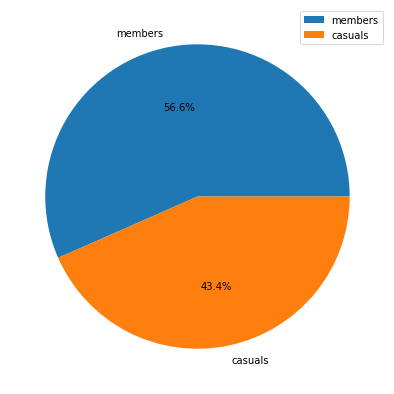

In [ ]:
labels=['members','casuals']
fig = plt.figure(figsize =(10, 7))
plt.pie(percentage,labels =labels,autopct = "%0.1f%%")
plt.legend()
plt.show()


From Abobe piechart we can clearly see that among rider group "members" are more than "casual" .

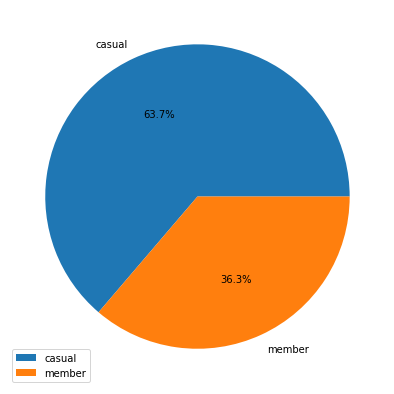

In [ ]:
fig=plt.figure(figsize=(10,7))
plt.pie(total_time,labels=['casual','member'], autopct="%0.1f%%")
plt.legend()
plt.show()

From Abobe piechart we can clearly see that in the terms of time duration among rider group "casual" are more than "member" .

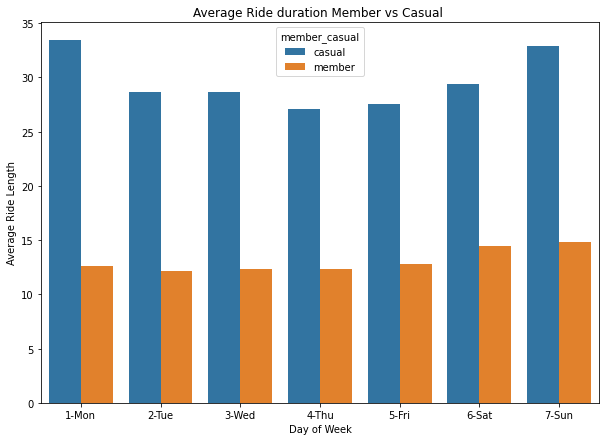

In [ ]:
fig = plt.figure(figsize =(10, 7))
sns.barplot(x='weekday', y='total_time_m', hue = 'member_casual', data=ride_duration_weekday)
plt.title("Average Ride duration Member vs Casual ")
plt.xlabel("Day of Week")
plt.ylabel("Average Ride Length")
plt.show()

The avobe figure shows that throughout the whole week, casual riders outweigh member riders.As well as we can notice casual riders ride duration longer in weekend compared to weekday.On the other hand member ride groups ride time duration higher in  sat and sunday compared to others day.

In [ ]:
px.bar(ride_duration_month,x='year_month',y='total_time_m',
       color="member_casual",
       barmode='group',
       labels = {'total_time_m': 'Average Ride Length in minutes', 'member_casual': 'Member/Casual', 'year_month': 'Months (July 2021 - June 2022)'},
       hover_name = 'member_casual', hover_data = {'member_casual': False, 'total_time_m': True}, 
       text = round(ride_duration_month['total_time_m'],1)
        
       )

According to the avobe bar chart, the average ride duration of casual riders is longer than that of members on a monthly basis.The maximum and minumum ride duration of casual rider is 32.8m and 23.1m . On the other hand  the average ride duration of member riders are much lower than casual memeber.On average It's maximum ride duration is 14.2m in monthly.

In [12]:
px.bar(bike_type,x='rideable_type',y="ride_id",
       barmode='group',
       color="member_casual",
       text="ride_id",
       labels={'rideable_type': 'Bike Type','ride_id':'Number of rides','member_casual':'Member/Casual'},
       hover_name = 'member_casual', hover_data = {'member_casual': False}
       )

According to the graphic showing the number of users by type of bike, only casual riders use docked bikes, membership riders favor classic bikes, and both groups use electric bikes almost equally, with membership riders favoring them more.

In [21]:
px.line(ride_number_month,x='year_month',y='ride_id',range_y = [0,450000],
        color='member_casual',
        line_shape = 'spline',
        markers=True, 
        labels = {'ride_id': 'Number of Rides', 'year_month': 'Months (July 2021 - June 2022)', 'member_casual': 'Member/Casual'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'year_month': True, 'ride_id': True}, 
        )

It demonstrates that the number of bike rides for both casual and member riders is at its lowest level during the winter (December to March), and we may observe a rise in the number of rides throughout the summer (May to September)

# Act

**Conclusion**:

* The majority of the riders are member users.

* The average ride duration for an casuals rider is longer than the average ride duration of the member riders.

* Classic bikes are the most popular kind.

* Only casual riders use docked bikes, Classic bikes are more popular among members and both use electric bikes equally.

* During summer months number of rides at its highest level for both casual and member riders.

**Deliverable**
* Build a marketing campaign to provide information on the advantages of using a annual membership.

* Offering some kind of promotion or launching marketing campaigns during summer, or occasionally in weekends would be profitable to the company.
* Increased advantages for riding bike in the winter months. One option is to distribute discounts and coupons.

* For casual riders who are unwilling to sign up for an annual membership, a special "Summer Membership" program should be introduced.
